## Dataset

In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. For this, we will use the "Bee or Wasp?" dataset that was obtained from Kaggle and slightly rebuilt.

You can download the dataset for this homework from [here](https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip):

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch.

## Data Preparation
The dataset contains around 2500 images of bees and around 2100 images of wasps.

The dataset contains separate folders for training and test sets.

## Model
For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
    - Use 32 filters
    - Kernel size should be (3, 3) (that's the size of the filter)
    - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
     - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
    - The output layer should have an activation - use the appropriate activation for the binary classification case
- As optimizer use SGD with the following parameters:
    - SGD(lr=0.002, momentum=0.8)

### Develop a model

##### Import libraries

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

##### Create model Sequential object and assign it to model variable. This object I'll use for develop and train neural network further.

In [20]:
model = models.Sequential()

##### Addd Conv2D Layer

In [21]:
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))

##### Add MaxPooking Layer

In [22]:
model.add(layers.MaxPooling2D((2, 2)))

##### Then Flatten

In [23]:
model.add(layers.Flatten())

##### Dense Layer

In [24]:
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

##### Optimizer

In [25]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

### Overall

In [34]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['accuracy'])

## Question 1
Since we have a binary classification problem, what is the best loss function for us?

- mean squared error
- binary crossentropy
- categorical crossentropy
- cosine similarity

### Answer: 
- binary_crossentropy

## Question 2

What's the number of parameters in the **convolutional layer** of our model? You can use the **summary** method for that.

- 1
- 65
- 896
- 11214912

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                11214912  
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

### Answer:
- 896

## Generators and Training
For the next two questions, use the following data generator for both train and test sets:

In [7]:
ImageDataGenerator(rescale=1./255)

- We don't need to do any additional pre-processing for the images.
- When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary classification problem?
- Use batch_size=20
- Use shuffle=True for both training and test sets.

**For training use .fit() with the following params:**

model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

In [36]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [37]:
train_ds = train_gen.flow_from_directory(directory = './data/train/',
                                         target_size=(150, 150), 
                                         batch_size=20,
                                         class_mode='binary',
                                         shuffle=True) 


test_ds = test_gen.flow_from_directory(directory = './data/test/',
                                     target_size=(150, 150),
                                     batch_size=20,
                                     class_mode='binary',
                                     shuffle=True)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


## Question 3
What is the **median of training accuracy** for all the epochs for this model?

- 0.20
- 0.40
- 0.60
- 0.80

In [38]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 8s 43ms/step - loss: 0.6743 - accuracy: 0.5700 - val_loss: 0.6354 - val_accuracy: 0.6318
Epoch 2/10
184/184 [==============================] - 8s 43ms/step - loss: 0.6294 - accuracy: 0.6418 - val_loss: 0.6021 - val_accuracy: 0.6471
Epoch 3/10
184/184 [==============================] - 8s 42ms/step - loss: 0.5770 - accuracy: 0.6987 - val_loss: 0.5603 - val_accuracy: 0.7048
Epoch 4/10
184/184 [==============================] - 8s 42ms/step - loss: 0.5354 - accuracy: 0.7359 - val_loss: 0.5377 - val_accuracy: 0.7407
Epoch 5/10
184/184 [==============================] - 8s 42ms/step - loss: 0.5125 - accuracy: 0.7618 - val_loss: 0.5366 - val_accuracy: 0.7222
Epoch 6/10
184/184 [==============================] - 8s 42ms/step - loss: 0.4790 - accuracy: 0.7800 - val_loss: 0.5250 - val_accuracy: 0.7582
Epoch 7/10
184/184 [==============================] - 8s 42ms/step - loss: 0.4570 - accuracy: 0.7971 - val_loss: 0.5148 - val_accuracy: 0.7418

In [39]:
history.history

{'loss': [0.6742805242538452,
  0.6294495463371277,
  0.5769554376602173,
  0.5353834629058838,
  0.5124533772468567,
  0.4790196716785431,
  0.45704030990600586,
  0.4382040798664093,
  0.4059171676635742,
  0.3854389488697052],
 'accuracy': [0.5700299143791199,
  0.6418275833129883,
  0.6986674070358276,
  0.7359260320663452,
  0.7617623209953308,
  0.7799836993217468,
  0.7971172332763672,
  0.8085395693778992,
  0.8300244808197021,
  0.8376393914222717],
 'val_loss': [0.6353545188903809,
  0.6020938754081726,
  0.5602622032165527,
  0.5376819968223572,
  0.5366268157958984,
  0.524971604347229,
  0.5148130059242249,
  0.517443060874939,
  0.5354128479957581,
  0.47849440574645996],
 'val_accuracy': [0.6318082809448242,
  0.6470588445663452,
  0.7047930359840393,
  0.7407407164573669,
  0.7222222089767456,
  0.758169949054718,
  0.741830050945282,
  0.7538126111030579,
  0.7505446672439575,
  0.7734204530715942]}

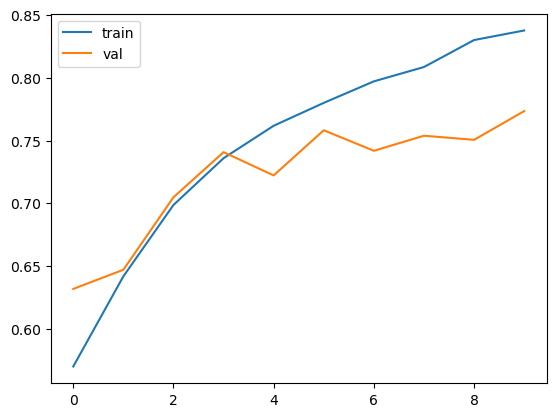

In [40]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'val')
         
plt.legend()

Median of training accuracy

In [41]:
acc_median = np.median(history.history['accuracy'])
acc_median

0.7708730101585388

### Answer: 
- 0.80

## Question 4
What is the standard deviation of **training loss** for all the epochs for this model?

- 0.031
- 0.061
- 0.091
- 0.131

In [42]:
acc_std = np.std(history.history['loss'])
acc_std

0.09036264646538196

### Answer: 
- 0.091

## Data Augmentation
For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

 - rotation_range=50,
- width_shift_range=0.1,
- height_shift_range=0.1,
- zoom_range=0.1,
- horizontal_flip=True,
- fill_mode='nearest'

## Question 5
Let's train our model for 10 more epochs using the same code as previously.

    - Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the **mean of test loss** for all the epochs for the model trained with augmentations?

- 0.18
- 0.48
- 0.78
- 0.108

In [43]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest', 
)

train_ds = train_gen.flow_from_directory(
    './data/train/',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    './data/test/',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [44]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 23s 123ms/step - loss: 0.4943 - accuracy: 0.7656 - val_loss: 0.4716 - val_accuracy: 0.7778
Epoch 2/10
184/184 [==============================] - 23s 122ms/step - loss: 0.4807 - accuracy: 0.7775 - val_loss: 0.5046 - val_accuracy: 0.7538
Epoch 3/10
184/184 [==============================] - 23s 123ms/step - loss: 0.4770 - accuracy: 0.7824 - val_loss: 0.4607 - val_accuracy: 0.7854
Epoch 4/10
184/184 [==============================] - 23s 123ms/step - loss: 0.4773 - accuracy: 0.7781 - val_loss: 0.4561 - val_accuracy: 0.7930
Epoch 5/10
184/184 [==============================] - 23s 123ms/step - loss: 0.4679 - accuracy: 0.7868 - val_loss: 0.4529 - val_accuracy: 0.7865
Epoch 6/10
184/184 [==============================] - 23s 123ms/step - loss: 0.4648 - accuracy: 0.7857 - val_loss: 0.4713 - val_accuracy: 0.7908
Epoch 7/10
184/184 [==============================] - 22s 122ms/step - loss: 0.4581 - accuracy: 0.7909 - val_loss: 0.4897 - val_ac

In [45]:
history.history

{'loss': [0.49430763721466064,
  0.4807189702987671,
  0.47704949975013733,
  0.47728464007377625,
  0.4679328203201294,
  0.464765727519989,
  0.45813870429992676,
  0.4642971456050873,
  0.4567197561264038,
  0.4567520320415497],
 'accuracy': [0.7655697464942932,
  0.7775360345840454,
  0.7824313044548035,
  0.7780799269676208,
  0.7867826819419861,
  0.7856948375701904,
  0.7908621430397034,
  0.7911340594291687,
  0.7916780114173889,
  0.7895023226737976],
 'val_loss': [0.4715858995914459,
  0.5045996308326721,
  0.46072128415107727,
  0.4561254382133484,
  0.4529013931751251,
  0.47134795784950256,
  0.4896993637084961,
  0.44238701462745667,
  0.44631874561309814,
  0.4678916037082672],
 'val_accuracy': [0.7777777910232544,
  0.7538126111030579,
  0.7854030728340149,
  0.7930282950401306,
  0.7864923477172852,
  0.7908496856689453,
  0.7734204530715942,
  0.7897603511810303,
  0.7908496856689453,
  0.7832244038581848]}

In [46]:
val_loss_mean = np.mean(history.history['val_loss'])
val_loss_mean

0.46635783314704893

### Answer:
- 0.48

## Question 6
What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- 0.38
- 0.58
- 0.78
- 0.98

In [47]:
val_acc_aug = history.history['val_accuracy']

val_acc_mean_aug = np.mean(val_acc_aug[5:10])
val_acc_mean_aug

0.78562091588974

### Answer: 
- 0.78